In [1]:
import math

# Pricing function for swapping X to Y
def swap_x_to_y(amount_y, reserve_x, reserve_y, oracle_price):
    """
    Calculate the amount of X needed to buy amount_y of Y.
    :param amount_y: Amount of Y to buy
    :param reserve_x: Reserve of X in the pool
    :param reserve_y: Reserve of Y in the pool
    :param oracle_price: Oracle price (X per Y)
    :return: Amount of X required
    """
    if amount_y >= reserve_y:
        raise ValueError("Cannot deplete the output reserve (Y)")
    
    # Δx = -p_o * r_y * ln(1 - Δy / r_y)
    delta_x = -oracle_price * reserve_y * math.log(1 - amount_y / reserve_y)
    return delta_x

# Function to calculate and display results
def test_swap(scenario_name, reserve_x, reserve_y, amount_y, oracle_price):
    print(f"\n=== {scenario_name} ===")
    print(f"Initial Reserves: X = {reserve_x}, Y = {reserve_y}")
    print(f"Oracle Price: {oracle_price} X per Y")
    print(f"Amount of Y to buy: {amount_y}")
    
    try:
        # Calculate required X
        delta_x = swap_x_to_y(amount_y, reserve_x, reserve_y, oracle_price)
        
        # New reserves after swap
        new_reserve_x = reserve_x + delta_x
        new_reserve_y = reserve_y - amount_y
        
        # Effective price paid (average price)
        effective_price = delta_x / amount_y
        
        # Slippage relative to oracle price
        slippage = (effective_price - oracle_price) / oracle_price * 100
        
        print(f"Amount of X required: {delta_x:.4f}")
        print(f"New Reserves: X = {new_reserve_x:.4f}, Y = {new_reserve_y:.4f}")
        print(f"Effective Price Paid: {effective_price:.4f} X per Y")
        print(f"Slippage: {slippage:.2f}%")
        
    except ValueError as e:
        print(f"Error: {e}")

# Test parameters
oracle_price = 1.0  # 1 X per 1 Y as a baseline oracle price
amount_y_to_buy = 10.0  # Amount of Y to buy in each scenario

# Scenario 1: Balanced Pool
test_swap(
    scenario_name="Balanced Pool",
    reserve_x=100.0,
    reserve_y=100.0,
    amount_y=amount_y_to_buy,
    oracle_price=oracle_price
)

# Scenario 2: Imbalanced Pool (Y is scarce)
test_swap(
    scenario_name="Imbalanced Pool (Y Scarce)",
    reserve_x=100.0,
    reserve_y=20.0,
    amount_y=amount_y_to_buy,
    oracle_price=oracle_price
)

# Scenario 3: Imbalanced Pool (X Scarce, Y Deep)
test_swap(
    scenario_name="Imbalanced Pool (X Scarce, Y Deep)",
    reserve_x=20.0,
    reserve_y=100.0,
    amount_y=amount_y_to_buy,
    oracle_price=oracle_price
)



=== Balanced Pool ===
Initial Reserves: X = 100.0, Y = 100.0
Oracle Price: 1.0 X per Y
Amount of Y to buy: 10.0
Amount of X required: 10.5361
New Reserves: X = 110.5361, Y = 90.0000
Effective Price Paid: 1.0536 X per Y
Slippage: 5.36%

=== Imbalanced Pool (Y Scarce) ===
Initial Reserves: X = 100.0, Y = 20.0
Oracle Price: 1.0 X per Y
Amount of Y to buy: 10.0
Amount of X required: 13.8629
New Reserves: X = 113.8629, Y = 10.0000
Effective Price Paid: 1.3863 X per Y
Slippage: 38.63%

=== Imbalanced Pool (X Scarce, Y Deep) ===
Initial Reserves: X = 20.0, Y = 100.0
Oracle Price: 1.0 X per Y
Amount of Y to buy: 10.0
Amount of X required: 10.5361
New Reserves: X = 30.5361, Y = 90.0000
Effective Price Paid: 1.0536 X per Y
Slippage: 5.36%


In [2]:
# Test parameters
oracle_price = 2.0  # 1 X per 1 Y as a baseline oracle price
amount_y_to_buy = 10.0  # Amount of Y to buy in each scenario

# Scenario 1: Balanced Pool
test_swap(
    scenario_name="Balanced Pool",
    reserve_x=100.0,
    reserve_y=100.0,
    amount_y=amount_y_to_buy,
    oracle_price=oracle_price
)

# Scenario 2: Imbalanced Pool (Y is scarce)
test_swap(
    scenario_name="Imbalanced Pool (Y Scarce)",
    reserve_x=100.0,
    reserve_y=20.0,
    amount_y=amount_y_to_buy,
    oracle_price=oracle_price
)

# Scenario 3: Imbalanced Pool (X Scarce, Y Deep)
test_swap(
    scenario_name="Imbalanced Pool (X Scarce, Y Deep)",
    reserve_x=20.0,
    reserve_y=100.0,
    amount_y=amount_y_to_buy,
    oracle_price=oracle_price
)



=== Balanced Pool ===
Initial Reserves: X = 100.0, Y = 100.0
Oracle Price: 2.0 X per Y
Amount of Y to buy: 10.0
Amount of X required: 21.0721
New Reserves: X = 121.0721, Y = 90.0000
Effective Price Paid: 2.1072 X per Y
Slippage: 5.36%

=== Imbalanced Pool (Y Scarce) ===
Initial Reserves: X = 100.0, Y = 20.0
Oracle Price: 2.0 X per Y
Amount of Y to buy: 10.0
Amount of X required: 27.7259
New Reserves: X = 127.7259, Y = 10.0000
Effective Price Paid: 2.7726 X per Y
Slippage: 38.63%

=== Imbalanced Pool (X Scarce, Y Deep) ===
Initial Reserves: X = 20.0, Y = 100.0
Oracle Price: 2.0 X per Y
Amount of Y to buy: 10.0
Amount of X required: 21.0721
New Reserves: X = 41.0721, Y = 90.0000
Effective Price Paid: 2.1072 X per Y
Slippage: 5.36%


In [6]:
import pandas as pd
import math

# Test function returning a pandas DataFrame with initial reserves
def test_swap_to_dataframe(reserve_x=2.0, reserve_y=100.0, oracle_price=1.0, y_amounts=None):
    """
    Test the AMM swap for various amounts of Y and return results in a DataFrame.
    :param reserve_x: Initial reserve of X
    :param reserve_y: Initial reserve of Y
    :param oracle_price: Oracle price (X per Y)
    :param y_amounts: List of Y amounts to test; if None, use default range
    :return: pandas DataFrame with swap results
    """
    # Default Y amounts to test (e.g., 1 to 50 in steps)
    if y_amounts is None:
        y_amounts = [1.0, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0]
    
    # Lists to store results
    data = {
        "Initial_Reserve_X": [],
        "Initial_Reserve_Y": [],
        "Amount_Y": [],
        "Amount_X_Required": [],
        "New_Reserve_X": [],
        "New_Reserve_Y": [],
        "Effective_Price": [],
        "Slippage_Percent": []
    }
    
    for amount_y in y_amounts:
        try:
            # Calculate required X
            delta_x = swap_x_to_y(amount_y, reserve_x, reserve_y, oracle_price)
            
            # New reserves
            new_reserve_x = reserve_x + delta_x
            new_reserve_y = reserve_y - amount_y
            
            # Effective price (average price paid)
            effective_price = delta_x / amount_y if amount_y > 0 else 0
            
            # Slippage as percentage
            slippage = (effective_price - oracle_price) / oracle_price * 100 if oracle_price > 0 else 0
            
            # Append to data
            data["Initial_Reserve_X"].append(reserve_x)
            data["Initial_Reserve_Y"].append(reserve_y)
            data["Amount_Y"].append(amount_y)
            data["Amount_X_Required"].append(delta_x)
            data["New_Reserve_X"].append(new_reserve_x)
            data["New_Reserve_Y"].append(new_reserve_y)
            data["Effective_Price"].append(effective_price)
            data["Slippage_Percent"].append(slippage)
            
        except ValueError as e:
            print(f"Error for Amount_Y = {amount_y}: {e}")
            break
    
    # Create DataFrame
    df = pd.DataFrame(data)
    print(f"\nScenario: Initial Reserves X = {reserve_x}, Y = {reserve_y}, Oracle Price = {oracle_price}")
    return df

# Run the test and display the DataFrame
if __name__ == "__main__":
    # Test with reserve_x = 2, reserve_y = 100
    df = test_swap_to_dataframe(reserve_x=2.0, reserve_y=100.0, oracle_price=1.0)
    pd.set_option('display.float_format', '{:.4f}'.format)  # Format floats to 4 decimal places
    print(df)


Scenario: Initial Reserves X = 2.0, Y = 100.0, Oracle Price = 1.0
   Initial_Reserve_X  Initial_Reserve_Y  Amount_Y  Amount_X_Required  \
0             2.0000           100.0000    1.0000             1.0050   
1             2.0000           100.0000    5.0000             5.1293   
2             2.0000           100.0000   10.0000            10.5361   
3             2.0000           100.0000   20.0000            22.3144   
4             2.0000           100.0000   30.0000            35.6675   
5             2.0000           100.0000   40.0000            51.0826   
6             2.0000           100.0000   50.0000            69.3147   

   New_Reserve_X  New_Reserve_Y  Effective_Price  Slippage_Percent  
0         3.0050        99.0000           1.0050            0.5034  
1         7.1293        95.0000           1.0259            2.5866  
2        12.5361        90.0000           1.0536            5.3605  
3        24.3144        80.0000           1.1157           11.5718  
4        37

In [14]:
df

,Initial_Reserve_X,Initial_Reserve_Y,Amount_Y,Amount_X_Required,New_Reserve_X,New_Reserve_Y,Effective_Price,Slippage_Percent
0,2.0000,100.0000,1.0000,1.0050,3.0050,99.0000,1.0050,0.5034
1,2.0000,100.0000,5.0000,5.1293,7.1293,95.0000,1.0259,2.5866
2,2.0000,100.0000,10.0000,10.5361,12.5361,90.0000,1.0536,5.3605
3,2.0000,100.0000,20.0000,22.3144,24.3144,80.0000,1.1157,11.5718
4,2.0000,100.0000,30.0000,35.6675,37.6675,70.0000,1.1889,18.8916
5,2.0000,100.0000,40.0000,51.0826,53.0826,60.0000,1.2771,27.7064
6,2.0000,100.0000,50.0000,69.3147,71.3147,50.0000,1.3863,38.6294


In [45]:
df2 = test_swap_to_dataframe(100.0, 100.0, 1.0, [1.0, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 99, 99.9999999999999])
df2


Scenario: Initial Reserves X = 100.0, Y = 100.0, Oracle Price = 1.0


,Initial_Reserve_X,Initial_Reserve_Y,Amount_Y,Amount_X_Required,New_Reserve_X,New_Reserve_Y,Effective_Price,Slippage_Percent
0,100.0000,100.0000,1.0000,1.0050,101.0050,99.0000,1.0050,0.5034
1,100.0000,100.0000,5.0000,5.1293,105.1293,95.0000,1.0259,2.5866
2,100.0000,100.0000,10.0000,10.5361,110.5361,90.0000,1.0536,5.3605
3,100.0000,100.0000,20.0000,22.3144,122.3144,80.0000,1.1157,11.5718
4,100.0000,100.0000,30.0000,35.6675,135.6675,70.0000,1.1889,18.8916
5,100.0000,100.0000,40.0000,51.0826,151.0826,60.0000,1.2771,27.7064
6,100.0000,100.0000,50.0000,69.3147,169.3147,50.0000,1.3863,38.6294
7,100.0000,100.0000,60.0000,91.6291,191.6291,40.0000,1.5272,52.7151
8,100.0000,100.0000,70.0000,120.3973,220.3973,30.0000,1.7200,71.9961
9,100.0000,100.0000,80.0000,160.9438,260.9438,20.0000,2.0118,101.1797


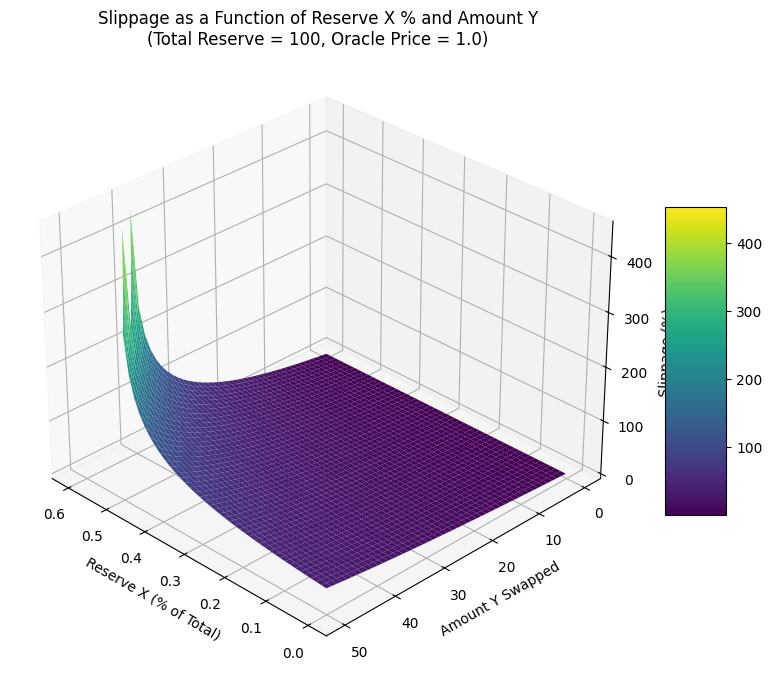

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to compute slippage for a grid of reserve_x_percent and amount_y
def compute_slippage_surface(total_reserve=100.0, oracle_price=1.0, x_percent_range=None, y_amount_range=None):
    """
    Compute slippage for varying reserve X percentage and Y amounts.
    :param total_reserve: Total reserve (X + Y)
    :param oracle_price: Oracle price (X per Y)
    :param x_percent_range: Array of X reserve percentages (0 to 0.999)
    :param y_amount_range: Array of Y amounts to swap
    :return: 2D array of slippage values
    """
    if x_percent_range is None:
        x_percent_range = np.linspace(0.001, 0.999, 50)  # Avoid 0 and 1 to prevent division issues
    if y_amount_range is None:
        y_amount_range = np.linspace(0.1, 50.0, 50)  # Range of Y amounts
    
    # Create meshgrid
    X_percent, Y_amount = np.meshgrid(x_percent_range, y_amount_range)
    Slippage = np.zeros_like(X_percent)
    
    for i in range(X_percent.shape[0]):
        for j in range(X_percent.shape[1]):
            reserve_x = X_percent[i, j] * total_reserve
            reserve_y = total_reserve - reserve_x
            amount_y = Y_amount[i, j]
            
            if amount_y < reserve_y:  # Only compute if swap is possible
                delta_x = swap_x_to_y(amount_y, reserve_x, reserve_y, oracle_price)
                effective_price = delta_x / amount_y
                slippage = (effective_price - oracle_price) / oracle_price * 100
                Slippage[i, j] = slippage
            else:
                Slippage[i, j] = np.inf  # Infinite slippage if Y reserve would deplete
    
    return X_percent, Y_amount, Slippage

# Generate data and plot
def plot_3d_surface():
    # Parameters
    total_reserve = 100.0
    oracle_price = 1.0
    
    # Compute slippage surface
    x_percent_range = np.linspace(0.001, 0.6, 50)
    #x_percent_range = np.linspace(0.001, 0.50, 50)
    y_amount_range = np.linspace(0.1, total_reserve * 0.5, 50)  # Up to half total reserve for visibility
    X_percent, Y_amount, Slippage = compute_slippage_surface(total_reserve, oracle_price, x_percent_range, y_amount_range)
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    surf = ax.plot_surface(X_percent, Y_amount, Slippage, cmap='viridis', edgecolor='none')
    
    # Labels and title
    ax.set_xlabel('Reserve X (% of Total)')
    ax.set_ylabel('Amount Y Swapped')
    ax.set_zlabel('Slippage (%)')
    ax.set_title('Slippage as a Function of Reserve X % and Amount Y\n(Total Reserve = 100, Oracle Price = 1.0)')
    
    # Add color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    # Adjust view angle for better visibility
    ax.view_init(elev=30, azim=135)
    
    plt.show()

# Run the plot
if __name__ == "__main__":
    plot_3d_surface()

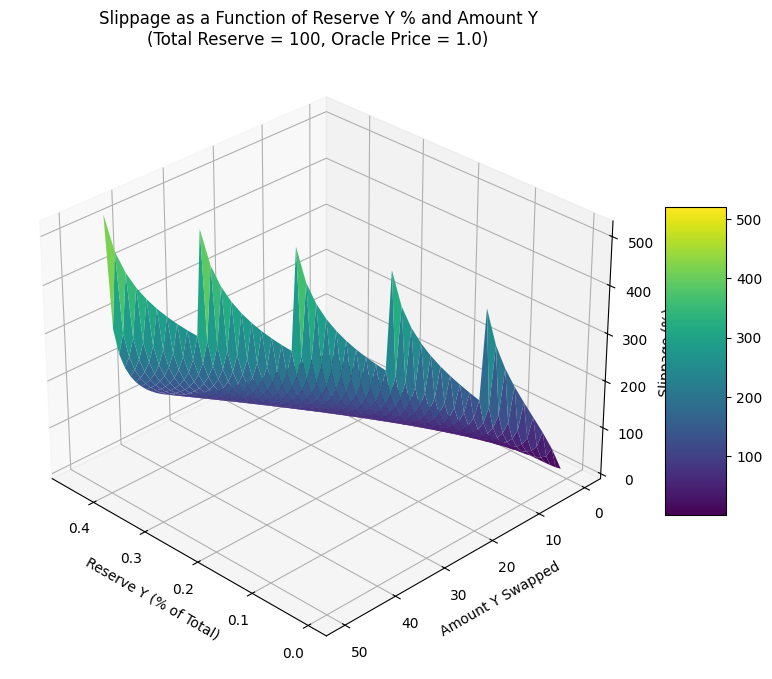

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to compute slippage for a grid of reserve_y_percent and amount_y
def compute_slippage_surface(total_reserve=100.0, oracle_price=1.0, y_percent_range=None, y_amount_range=None):
    """
    Compute slippage for varying reserve Y percentage and Y amounts.
    :param total_reserve: Total reserve (X + Y)
    :param oracle_price: Oracle price (X per Y)
    :param y_percent_range: Array of Y reserve percentages (0 to 0.999)
    :param y_amount_range: Array of Y amounts to swap
    :return: 2D array of slippage values
    """
    if y_percent_range is None:
        x_percent_range = np.linspace(0.001, 0.999, 50)  # Avoid 0 and 1 to prevent division issues
    if y_amount_range is None:
        y_amount_range = np.linspace(0.1, 50.0, 50)  # Range of Y amounts
    
    # Create meshgrid
    Y_percent, Y_amount = np.meshgrid(y_percent_range, y_amount_range)
    Slippage = np.zeros_like(Y_percent)
    
    for i in range(Y_percent.shape[0]):
        for j in range(Y_percent.shape[1]):
            reserve_y = Y_percent[i, j] * total_reserve
            reserve_x = total_reserve - reserve_y
            amount_y = Y_amount[i, j]
            
            if amount_y < reserve_y:  # Only compute if swap is possible
                delta_x = swap_x_to_y(amount_y, reserve_x, reserve_y, oracle_price)
                effective_price = delta_x / amount_y
                slippage = (effective_price - oracle_price) / oracle_price * 100
                Slippage[i, j] = slippage
            else:
                Slippage[i, j] = np.inf  # Infinite slippage if Y reserve would deplete
    
    return Y_percent, Y_amount, Slippage

# Generate data and plot
def plot_3d_surface():
    # Parameters
    total_reserve = 100.0
    oracle_price = 1.0
    
    # Compute slippage surface
    y_percent_range = np.linspace(0.001, 0.45, 50)
    y_amount_range = np.linspace(0.1, total_reserve * 0.5, 50)  # Up to half total reserve for visibility
    Y_percent, Y_amount, Slippage = compute_slippage_surface(total_reserve, oracle_price, y_percent_range, y_amount_range)
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    surf = ax.plot_surface(Y_percent, Y_amount, Slippage, cmap='viridis', edgecolor='none')
    
    # Labels and title
    ax.set_xlabel('Reserve Y (% of Total)')
    ax.set_ylabel('Amount Y Swapped')
    ax.set_zlabel('Slippage (%)')
    ax.set_title('Slippage as a Function of Reserve Y % and Amount Y\n(Total Reserve = 100, Oracle Price = 1.0)')
    
    # Add color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    # Adjust view angle for better visibility
    ax.view_init(elev=30, azim=135)
    
    plt.show()

# Run the plot
if __name__ == "__main__":
    plot_3d_surface()

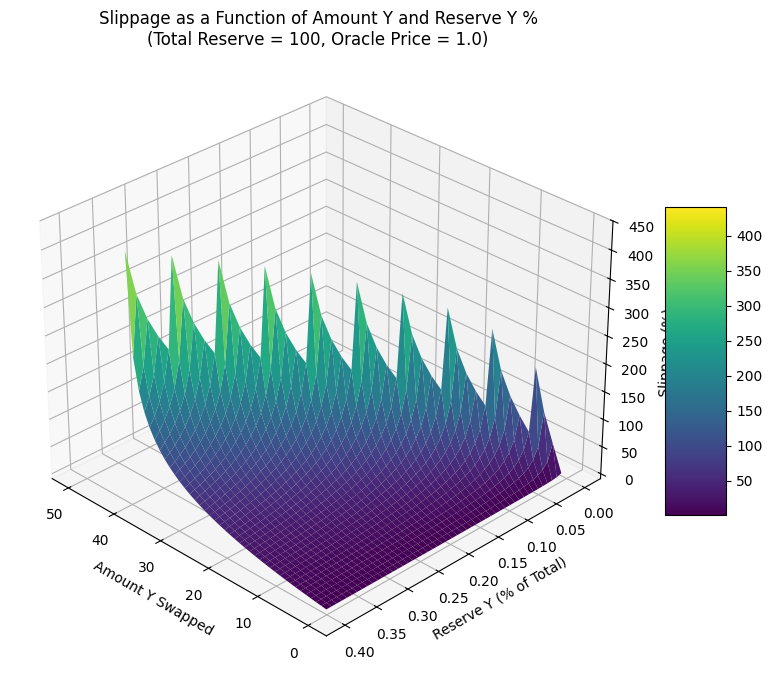

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to compute slippage for a grid of reserve_y_percent and amount_y
def compute_slippage_surface(total_reserve=100.0, oracle_price=1.0, y_percent_range=None, y_amount_range=None):
    """
    Compute slippage for varying reserve Y percentage and Y amounts.
    :param total_reserve: Total reserve (X + Y)
    :param oracle_price: Oracle price (X per Y)
    :param y_percent_range: Array of Y reserve percentages (0 to 0.999)
    :param y_amount_range: Array of Y amounts to swap
    :return: 2D array of slippage values
    """
    if y_percent_range is None:
        x_percent_range = np.linspace(0.001, 0.999, 50)  # Avoid 0 and 1 to prevent division issues
    if y_amount_range is None:
        y_amount_range = np.linspace(0.1, 50.0, 50)  # Range of Y amounts
    
    # Create meshgrid with swapped axes: X is amount_y, Y is y_percent
    Amount_Y, Y_percent = np.meshgrid(y_amount_range, y_percent_range)
    Slippage = np.zeros_like(Amount_Y)
    
    for i in range(Amount_Y.shape[0]):
        for j in range(Amount_Y.shape[1]):
            reserve_y = Y_percent[i, j] * total_reserve
            reserve_x = total_reserve - reserve_y
            amount_y = Amount_Y[i, j]
            
            if amount_y < reserve_y:  # Only compute if swap is possible
                delta_x = swap_x_to_y(amount_y, reserve_x, reserve_y, oracle_price)
                effective_price = delta_x / amount_y
                slippage = (effective_price - oracle_price) / oracle_price * 100
                Slippage[i, j] = slippage
            else:
                Slippage[i, j] = np.inf  # Infinite slippage if Y reserve would deplete
    
    return Amount_Y, Y_percent, Slippage

# Generate data and plot
def plot_3d_surface():
    # Parameters
    total_reserve = 100.0
    oracle_price = 1.0
    
    # Compute slippage surface
    y_percent_range = np.linspace(0.001, 0.4, 50)
    y_amount_range = np.linspace(0.1, total_reserve * 0.5, 50)  # Up to half total reserve for visibility
    Amount_Y, Y_percent, Slippage = compute_slippage_surface(total_reserve, oracle_price, y_percent_range, y_amount_range)
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    surf = ax.plot_surface(Amount_Y, Y_percent, Slippage, cmap='viridis', edgecolor='none')
    
    # Labels and title
    ax.set_xlabel('Amount Y Swapped')
    ax.set_ylabel('Reserve Y (% of Total)')
    ax.set_zlabel('Slippage (%)')
    ax.set_title('Slippage as a Function of Amount Y and Reserve Y %\n(Total Reserve = 100, Oracle Price = 1.0)')
    
    # Add color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    # Adjust view angle for better visibility
    ax.view_init(elev=30, azim=135)
    
    plt.show()

# Run the plot
if __name__ == "__main__":
    plot_3d_surface()

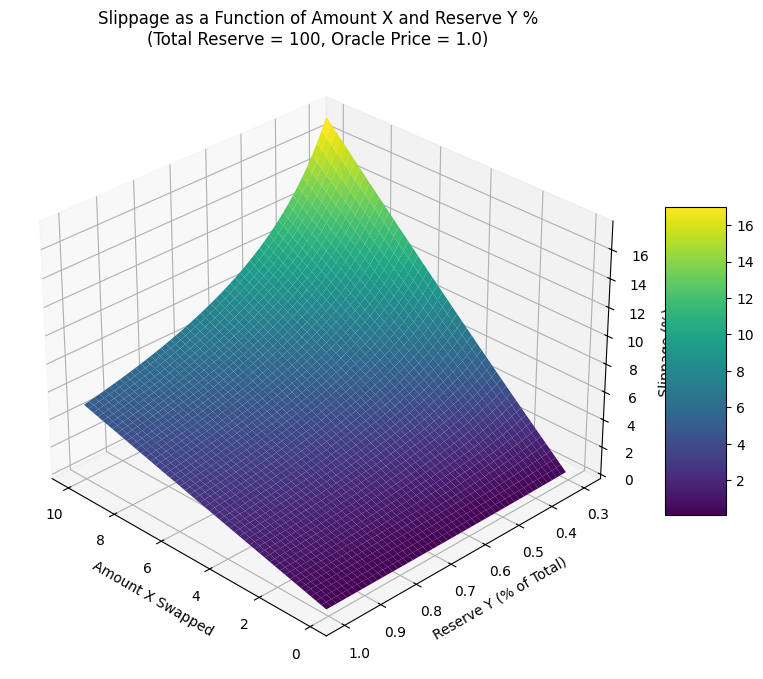

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Pricing function for swapping X to Y (returns amount Y for given X)
def swap_x_to_y_for_x_input(amount_x, reserve_x, reserve_y, oracle_price):
    """
    Calculate the amount of Y received for amount_x of X.
    :param amount_x: Amount of X to swap
    :param reserve_x: Reserve of X in the pool
    :param reserve_y: Reserve of Y in the pool
    :param oracle_price: Oracle price (X per Y)
    :return: Amount of Y received
    """
    # From Δx = -p_o * r_y * ln(1 - Δy / r_y), solve for Δy
    # Δx = -p_o * r_y * ln(1 - Δy / r_y)
    # ln(1 - Δy / r_y) = -Δx / (p_o * r_y)
    # 1 - Δy / r_y = exp(-Δx / (p_o * r_y))
    # Δy / r_y = 1 - exp(-Δx / (p_o * r_y))
    # Δy = r_y * (1 - exp(-Δx / (p_o * r_y)))
    if amount_x <= 0:
        return 0.0
    delta_y = reserve_y * (1 - np.exp(-amount_x / (oracle_price * reserve_y)))
    if delta_y >= reserve_y:  # Prevent depletion
        return reserve_y * 0.999  # Cap just below full reserve
    return delta_y

def swap_y_to_x_for_y_input(amount_y, reserve_x, reserve_y, oracle_price):
    if amount_y <= 0:
        return 0.0
    delta_x = reserve_x * (1 - np.exp(-oracle_price * amount_y / reserve_x))
    if delta_x >= reserve_x:
        return reserve_x * 0.999
    return delta_x

# Function to compute slippage for a grid of reserve_y_percent and amount_x
def compute_slippage_surface(total_reserve=100.0, oracle_price=1.0, y_percent_range=None, x_amount_range=None):
    """
    Compute slippage for varying reserve Y percentage and X amounts.
    :param total_reserve: Total reserve (X + Y)
    :param oracle_price: Oracle price (X per Y)
    :param y_percent_range: Array of Y reserve percentages (0 to 0.999)
    :param x_amount_range: Array of X amounts to swap
    :return: 2D array of slippage values
    """
    if y_percent_range is None:
        y_percent_range = np.linspace(0.001, 0.999, 50)  # Avoid 0 and 1
    if x_amount_range is None:
        x_amount_range = np.linspace(0.1, 50.0, 50)  # Range of X amounts
    
    # Create meshgrid: X is amount_x, Y is y_percent
    Amount_X, Y_percent = np.meshgrid(x_amount_range, y_percent_range)
    Slippage = np.zeros_like(Amount_X)
    
    for i in range(Amount_X.shape[0]):
        for j in range(Amount_X.shape[1]):
            reserve_y = Y_percent[i, j] * total_reserve
            reserve_x = total_reserve - reserve_y
            amount_x = Amount_X[i, j]
            
            delta_y = swap_x_to_y_for_x_input(amount_x, reserve_x, reserve_y, oracle_price)
            if delta_y > 0:  # Avoid division by zero
                effective_price = amount_x / delta_y  # X per Y
                slippage = (effective_price - oracle_price) / oracle_price * 100
                Slippage[i, j] = slippage
            else:
                Slippage[i, j] = 0.0  # No slippage if no Y received
    
    return Amount_X, Y_percent, Slippage

# Generate data and plot
def plot_3d_surface():
    # Parameters
    total_reserve = 100.0
    oracle_price = 1.0
    
    # Compute slippage surface
    y_percent_range = np.linspace(0.30, 0.999, 50)
    x_amount_range = np.linspace(0.1, 10.0, 50)  # Up to 50 X for visibility
    Amount_X, Y_percent, Slippage = compute_slippage_surface(total_reserve, oracle_price, y_percent_range, x_amount_range)
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    surf = ax.plot_surface(Amount_X, Y_percent, Slippage, cmap='viridis', edgecolor='none')
    
    # Labels and title
    ax.set_xlabel('Amount X Swapped')
    ax.set_ylabel('Reserve Y (% of Total)')
    ax.set_zlabel('Slippage (%)')
    ax.set_title('Slippage as a Function of Amount X and Reserve Y %\n(Total Reserve = 100, Oracle Price = 1.0)')
    
    # Add color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    # Adjust view angle for better visibility
    ax.view_init(elev=30, azim=135)
    
    plt.show()

# Run the plot
if __name__ == "__main__":
    plot_3d_surface()

In [ ]:
import numpy as np

# Pricing function for swapping X to Y (returns amount Y for given X)
def swap_x_to_y_for_x_input(amount_x, reserve_x, reserve_y, oracle_price, decimals_x, decimals_y):
    """
    Calculate the amount of Y received for amount_x of X, accounting for decimals.
    :param amount_x: Amount of X to swap (in raw units, e.g., wei)
    :param reserve_x: Reserve of X in the pool (in raw units)
    :param reserve_y: Reserve of Y in the pool (in raw units)
    :param oracle_price: Oracle price (X per Y, in human-readable units, e.g., ETH per USDC)
    :param decimals_x: Number of decimals for X (e.g., 18 for ETH)
    :param decimals_y: Number of decimals for Y (e.g., 6 for USDC)
    :return: Amount of Y received (in raw units)
    """
    if amount_x <= 0:
        return 0.0
    
    # Adjust oracle price to raw units: p_o_raw = p_o * 10^(d_x - d_y)
    p_o_raw = oracle_price * 10**(decimals_x - decimals_y)
    
    # All inputs are in raw units, so use p_o_raw directly
    delta_y = reserve_y * (1 - np.exp(-amount_x / (p_o_raw * reserve_y)))
    
    if delta_y >= reserve_y:  # Prevent depletion
        return reserve_y * 0.999
    
    return delta_y

# Pricing function for swapping Y to X (returns amount X for given Y)
def swap_y_to_x_for_y_input(amount_y, reserve_x, reserve_y, oracle_price, decimals_x, decimals_y):
    """
    Calculate the amount of X received for amount_y of Y, accounting for decimals.
    :param amount_y: Amount of Y to swap (in raw units, e.g., microdollars)
    :param reserve_x: Reserve of X in the pool (in raw units)
    :param reserve_y: Reserve of Y in the pool (in raw units)
    :param oracle_price: Oracle price (X per Y, in human-readable units)
    :param decimals_x: Number of decimals for X
    :param decimals_y: Number of decimals for Y
    :return: Amount of X received (in raw units)
    """
    if amount_y <= 0:
        return 0.0
    
    # Adjust oracle price to raw units: p_o_raw = p_o * 10^(d_x - d_y)
    p_o_raw = oracle_price * 10**(decimals_x - decimals_y)
    
    # All inputs are in raw units, so use p_o_raw directly
    delta_x = reserve_x * (1 - np.exp(-p_o_raw * amount_y / reserve_x))
    
    if delta_x >= reserve_x:  # Prevent depletion
        return reserve_x * 0.999
    
    return delta_x

# Example usage
if __name__ == "__main__":
    # Example: X = ETH (18 decimals), Y = USDC (6 decimals)
    decimals_x = 18
    decimals_y = 6
    reserve_x = 10 * 10**decimals_x  # 10 ETH in wei
    reserve_y = 20000 * 10**decimals_y  # 20,000 USDC in microdollars
    oracle_price = 2000  # 2000 ETH per USDC (human-readable)
    
    # X to Y: Swap 1 ETH for USDC
    amount_x = 1 * 10**decimals_x  # 1 ETH in wei
    delta_y = swap_x_to_y_for_x_input(amount_x, reserve_x, reserve_y, oracle_price, decimals_x, decimals_y)
    print(f"X to Y: {amount_x / 10**decimals_x} X -> {delta_y / 10**decimals_y:.4f} Y")
    print(f"Effective price (X per Y): {(amount_x / 10**decimals_x) / (delta_y / 10**decimals_y):.4f}")
    
    # Y to X: Swap 2000 USDC for ETH
    amount_y = 2000 * 10**decimals_y  # 2000 USDC in microdollars
    delta_x = swap_y_to_x_for_y_input(amount_y, reserve_x, reserve_y, oracle_price, decimals_x, decimals_y)
    print(f"Y to X: {amount_y / 10**decimals_y} Y -> {delta_x / 10**decimals_x:.4f} X")
    print(f"Effective price (Y per X): {(amount_y / 10**decimals_y) / (delta_x / 10**decimals_x):.4f}")

In [83]:
import numpy as np

# Pricing function for swapping X to Y (returns amount Y for given X)
def swap_x_to_y_for_x_input(amount_x, reserve_x, reserve_y, price_x, price_y, decimals_x, decimals_y):
    """
    Calculate the amount of Y received for amount_x of X, with separate price components.
    :param amount_x: Amount of X to swap (in raw units, e.g., wei)
    :param reserve_x: Reserve of X in the pool (in raw units)
    :param reserve_y: Reserve of Y in the pool (in raw units)
    :param price_x: X component of oracle price (human-readable, e.g., 2000 ETH)
    :param price_y: Y component of oracle price (human-readable, e.g., 1 USDC)
    :param decimals_x: Number of decimals for X (e.g., 18 for ETH)
    :param decimals_y: Number of decimals for Y (e.g., 6 for USDC)
    :return: Amount of Y received (in raw units)
    """
    if amount_x <= 0:
        return 0.0
    
    # Calculate oracle price in raw units: p_o_raw = (price_x * 10^d_x) / (price_y * 10^d_y)
    p_o_raw = (price_x * 10**decimals_x) / (price_y * 10**decimals_y)
    
    # Formula remains the same, using p_o_raw
    delta_y = reserve_y * (1 - np.exp(-amount_x / (p_o_raw * reserve_y)))
    
    if delta_y >= reserve_y:  # Prevent depletion
        return reserve_y * 0.999
    
    return delta_y

# Pricing function for swapping Y to X (returns amount X for given Y)
def swap_y_to_x_for_y_input(amount_y, reserve_x, reserve_y, price_x, price_y, decimals_x, decimals_y):
    """
    Calculate the amount of X received for amount_y of Y, with separate price components.
    :param amount_y: Amount of Y to swap (in raw units, e.g., microdollars)
    :param reserve_x: Reserve of X in the pool (in raw units)
    :param reserve_y: Reserve of Y in the pool (in raw units)
    :param price_x: X component of oracle price (human-readable)
    :param price_y: Y component of oracle price (human-readable)
    :param decimals_x: Number of decimals for X
    :param decimals_y: Number of decimals for Y
    :return: Amount of X received (in raw units)
    """
    if amount_y <= 0:
        return 0.0
    
    # Calculate oracle price in raw units: p_o_raw = (price_x * 10^d_x) / (price_y * 10^d_y)
    p_o_raw = (price_x * 10**decimals_x) / (price_y * 10**decimals_y)
    
    # Formula remains the same, using p_o_raw
    delta_x = reserve_x * (1 - np.exp(-p_o_raw * amount_y / reserve_x))
    
    if delta_x >= reserve_x:  # Prevent depletion
        return reserve_x * 0.999
    
    return delta_x

# Example usage
if __name__ == "__main__":
    # Example: X = ETH (18 decimals), Y = USDC (6 decimals)
    decimals_x = 18
    decimals_y = 6
    reserve_x = 10 * 10**decimals_x  # 10 ETH in wei
    reserve_y = 20000 * 10**decimals_y  # 20,000 USDC in microdollars
    price_x = 2000  # 2000 ETH (human-readable)
    price_y = 1     # 1 USDC (human-readable)
    
    # X to Y: Swap 1 ETH for USDC
    amount_x = 1 * 10**decimals_x  # 1 ETH in wei
    delta_y = swap_x_to_y_for_x_input(amount_x, reserve_x, reserve_y, price_x, price_y, decimals_x, decimals_y)
    print(f"X to Y: {amount_x / 10**decimals_x} X -> {delta_y / 10**decimals_y:.4f} Y")
    print(f"Effective price (X per Y): {(amount_x / 10**decimals_x) / (delta_y / 10**decimals_y):.4f}")
    
    # Y to X: Swap 2000 USDC for ETH
    amount_y = 0.0000000001 * 10**decimals_y  # 2000 USDC in microdollars
    delta_x = swap_y_to_x_for_y_input(amount_y, reserve_x, reserve_y, price_x, price_y, decimals_x, decimals_y)
    print(f"Y to X: {amount_y / 10**decimals_y} Y -> {delta_x / 10**decimals_x:.4f} X")
    print(f"Effective price (Y per X): {(delta_x / 10**decimals_x) / (amount_y / 10**decimals_y):.4f}")

X to Y: 1.0 X -> 0.0005 Y
Effective price (X per Y): 2000.0000
Y to X: 1e-10 Y -> 0.0000 X
Effective price (Y per X): 0.0005
Effective price (Y per X): 2000.0000


In [73]:
1/2000

0.0005